# Web scraping para economistas

- Alejandro Acosta León
- 2024-06-01

---

## Nivel 1: data estructurada en HTML

En algunas ocasiones, la información que necesitamos se encuentra en una página web, la página web está estructurada en HTML y la información que buscamos está en una tabla. 

<div style="text-align: center;"><h1>🦄</h1></div>

Por ejemplo, revisemos la página de Wikipedia que contiene la lista de salarios mínimos por país: [https://en.wikipedia.org/wiki/List_of_countries_by_minimum_wage](https://en.wikipedia.org/wiki/List_of_countries_by_minimum_wage) 



In [4]:
import pandas as pd

In [5]:
oecd = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_minimum_wage')

In [6]:
oecd = oecd[2]


In [7]:
oecd = oecd.set_index(('Country', 'Country', 'Country'))
oecd.index.names = ['Country']


In [8]:
oecd

2018                                              \
                    Nominal             PPP        Annual working hours   
                     Annual Hourly   Annual Hourly Annual working hours   
Country                                                                   
Australia           25970.8  13.10  24481.2   12.4                 1976   
Belgium             21293.0  10.20  22746.8   10.9                 2086   
Canada              20552.5   9.90  20946.0   10.1                 2080   
Chile                4902.5   2.10   7044.4    3.0                 2346   
Colombia             3451.3   1.20   7677.4    2.6                 2920   
Czech Republic       6565.8   3.30  10789.9    5.4                 2000   
Estonia              6869.8   3.40   9890.2    4.9                 2020   
France              20989.7  13.20  21860.3   12.0                 2289   
Germany             20414.6  10.00  23439.6   11.5                 2033   
Greece               9208.7   3.70  13040.0    5.2                 2507   
Hungary              5887.6   2.80  11049.2    5.2                 2112   
Ireland             22446.1  10.80  20585.9    9.9                 2080   
Israel              17992.6   8.10  15416.5    6.9                 2232   
Japan               16805.5   8.10  16607.6    8.0                 2080   
South Korea         16265.6   6.50  19540.8    7.8                 2508   
Latvia               5877.2   2.80   9168.8    4.4                 2086   
Lithuania            5498.9   2.80   9694.0    4.9                 1959   
Luxembourg          27601.0  13.30  25811.0   12.4                 2077   
Mexico               1236.0   0.60   2238.5    1.1                 2080   
Netherlands         23618.0  10.50  24859.9   11.0                 2253   
New Zealand         22541.6  10.80  21716.3   10.4                 2080   
Poland               6709.8   3.20  13704.8    6.6                 2086   
Portugal             9120.9   4.40  12720.3    6.1                 2086   
Slovak Republic      6620.0   2.10  10001.1    3.2                 3145   
Slovenia            11506.4   5.50  16015.8    7.7                 2086   
Spain               11614.2   5.60  14731.8    7.1                 2086   
Turkey               4943.8   2.40  12848.3    6.2                 2086   
United Kingdom      20918.7  12.23  21132.2   10.2                 2079   
United States       15353.3   7.40  15353.3    7.4                 2080   
Costa Rica           5927.8   2.20   9326.5    3.4                 2711   
Brazil               3023.8   1.30   4925.3    2.1                 2346   
Russian Federation   2053.7   1.00   4936.5    2.4                 2086   

                       2019                                              
                    Nominal             PPP        Annual working hours  
                     Annual Hourly   Annual Hourly Annual working hours  
Country                                                                  
Australia           26388.5   13.4  24874.9   12.6                 1976  
Belgium             21410.8   10.3  22872.6   11.0                 2086  
Canada              20880.7   10.0  21280.5   10.2                 2080  
Chile                5101.7    2.2   7330.7    3.1                 2346  
Colombia             3533.7    1.2   7860.9    2.7                 2920  
Czech Republic       7064.3    3.5  11609.0    5.8                 2000  
Estonia              7254.2    3.6  10443.5    5.2                 2019  
France              21889.6   11.2  21949.0   12.1                 2189  
Germany             20916.3   10.3  24015.6   11.8                 2033  
Greece              10103.7    4.0  14307.4    5.7                 2507  
Hungary              6151.5    2.9  11544.5    5.5                 2086  
Ireland             22819.4   11.0  20928.3   10.1                 2080  
Israel              17842.5    8.0  15287.8    6.9                 2232  
Japan                     -      -        -      -              

In [9]:
oecd['2018']['PPP']['Hourly'].describe()

count    32.000000
mean      6.950000
std       3.339886
min       1.100000
25%       4.775000
50%       6.750000
75%      10.125000
max      12.400000
Name: Hourly, dtype: float64

<Axes: title={'center': 'OECD Minimum Wage in 2018 (PPP)'}, xlabel='Country'>

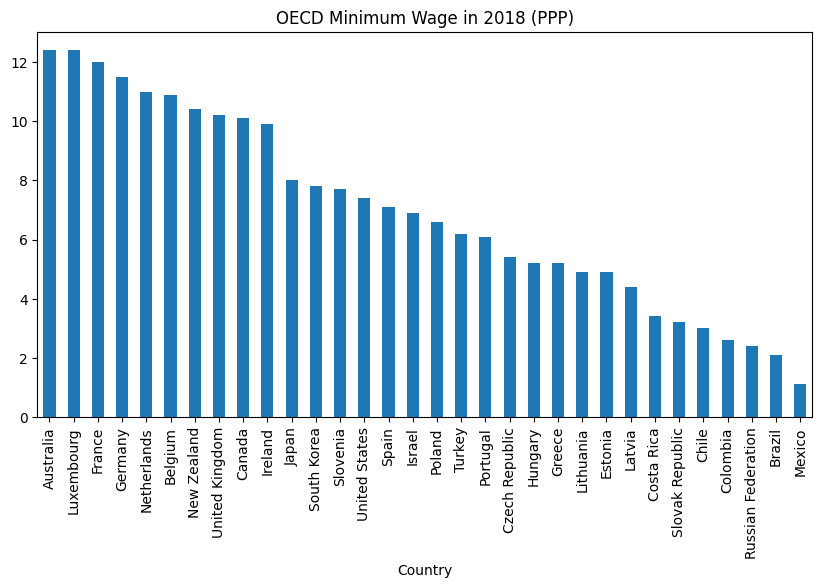

In [10]:
oecd['2018']['PPP']['Hourly'] \
    .sort_values(ascending=False) \
        .plot(kind='bar', figsize=(10, 5), title='OECD Minimum Wage in 2018 (PPP)')

---

## Nivel 2: data semi-estructurada

La información que necesitamos se encuentra en una página web, la página web está estructurada en HTML pero la información que buscamos no está en una tabla. También podría suceder que la información no está directamente en la página web, sino que está en un archivo PDF, en una imagen o en un excel.

Por ejemplo: https://www.bce.fin.ec/index.php/component/k2/item/325-ver-bolet%C3%ADn-semanal

Pero antes un breve repaso de cómo funciona una página web:  

<div style="text-align: center;">
    <img src="./pptp/html-structure1.png" alt="html1" height="300">
    <span style="font-size: 48px;">&rarr;</span>
    <img src="./pptp/html-structure2.png" alt="html2" height="300">
</div>

In [58]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
from tqdm.notebook import tqdm
from time import sleep
from unidecode import unidecode

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)


In [12]:
url = "https://contenido.bce.fin.ec/home1/estadisticas/bolsemanal/IndiceBMS.htm"
page = requests.get(url, verify=False)
soup = BeautifulSoup(page.content, 'html.parser')

c:\Users\alejo\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'contenido.bce.fin.ec'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [13]:
# Buscar todos los links del sitio
all_links = soup.find_all('a', href=True)
all_links

[<a href="https://contenido.bce.fin.ec/documentos/Estadisticas/SectorMonFin/TasasInteres/Indice.htm">Tasas de Interés</a>,
 <a href="https://contenido.bce.fin.ec/documentos/PublicacionesNotas/Catalogo/Coyuntura/s731/BMS_05042024.xlsx">05 de Abril de 2024</a>,
 <a href="https://contenido.bce.fin.ec/documentos/PublicacionesNotas/Catalogo/Coyuntura/s731/BMS_12042024.xlsx">12 de Abril de 2024</a>,
 <a href="https://contenido.bce.fin.ec/documentos/PublicacionesNotas/Catalogo/Coyuntura/s731/BMS_19042024.xlsx">19 de Abril de 2024</a>,
 <a href="https://contenido.bce.fin.ec/documentos/PublicacionesNotas/Catalogo/Coyuntura/s731/BMS_26042024.xlsx">26 de Abril de 2024</a>,
 <a href="https://contenido.bce.fin.ec/documentos/PublicacionesNotas/Catalogo/Coyuntura/s731/BMS_02052024.xlsx">02 de Mayo de 2024</a>,
 <a href="https://contenido.bce.fin.ec/documentos/PublicacionesNotas/Catalogo/Coyuntura/s731/BMS_10052024.xlsx">10 de Mayo de 2024</a>,
 <a href="https://contenido.bce.fin.ec/documentos/Publica

In [14]:
# para el ejercicio seleccionaremos los 10 primeros links
all_links = all_links[:10]
all_links

[<a href="https://contenido.bce.fin.ec/documentos/Estadisticas/SectorMonFin/TasasInteres/Indice.htm">Tasas de Interés</a>,
 <a href="https://contenido.bce.fin.ec/documentos/PublicacionesNotas/Catalogo/Coyuntura/s731/BMS_05042024.xlsx">05 de Abril de 2024</a>,
 <a href="https://contenido.bce.fin.ec/documentos/PublicacionesNotas/Catalogo/Coyuntura/s731/BMS_12042024.xlsx">12 de Abril de 2024</a>,
 <a href="https://contenido.bce.fin.ec/documentos/PublicacionesNotas/Catalogo/Coyuntura/s731/BMS_19042024.xlsx">19 de Abril de 2024</a>,
 <a href="https://contenido.bce.fin.ec/documentos/PublicacionesNotas/Catalogo/Coyuntura/s731/BMS_26042024.xlsx">26 de Abril de 2024</a>,
 <a href="https://contenido.bce.fin.ec/documentos/PublicacionesNotas/Catalogo/Coyuntura/s731/BMS_02052024.xlsx">02 de Mayo de 2024</a>,
 <a href="https://contenido.bce.fin.ec/documentos/PublicacionesNotas/Catalogo/Coyuntura/s731/BMS_10052024.xlsx">10 de Mayo de 2024</a>,
 <a href="https://contenido.bce.fin.ec/documentos/Publica

In [15]:
# Filtrar los enlaces que no contienen 'BMS'
bms_links = []
for link in all_links:
    if re.search(r'BMS', link['href']):
        bms_links.append(link)


In [16]:
# Crear un diccionario con los nombres de los enlaces y la URL
links = {link['href'].split('/')[-1]: link['href'] for link in bms_links}

In [25]:
links

{'BMS_05042024.xlsx': 'https://contenido.bce.fin.ec/documentos/PublicacionesNotas/Catalogo/Coyuntura/s731/BMS_05042024.xlsx',
 'BMS_12042024.xlsx': 'https://contenido.bce.fin.ec/documentos/PublicacionesNotas/Catalogo/Coyuntura/s731/BMS_12042024.xlsx',
 'BMS_19042024.xlsx': 'https://contenido.bce.fin.ec/documentos/PublicacionesNotas/Catalogo/Coyuntura/s731/BMS_19042024.xlsx',
 'BMS_26042024.xlsx': 'https://contenido.bce.fin.ec/documentos/PublicacionesNotas/Catalogo/Coyuntura/s731/BMS_26042024.xlsx',
 'BMS_02052024.xlsx': 'https://contenido.bce.fin.ec/documentos/PublicacionesNotas/Catalogo/Coyuntura/s731/BMS_02052024.xlsx',
 'BMS_10052024.xlsx': 'https://contenido.bce.fin.ec/documentos/PublicacionesNotas/Catalogo/Coyuntura/s731/BMS_10052024.xlsx',
 'BMS_17052024.xlsx': 'https://contenido.bce.fin.ec/documentos/PublicacionesNotas/Catalogo/Coyuntura/s731/BMS_17052024.xlsx',
 'BMS_23052024.xlsx': 'https://contenido.bce.fin.ec/documentos/PublicacionesNotas/Catalogo/Coyuntura/s731/BMS_23052024

In [30]:
download_dir = './descargas/'

for name,link in tqdm(links.items()):
    response = requests.get(link, verify=False)
    with open(download_dir + name, 'wb') as f:
        f.write(response.content)
    sleep(1.5)

  0%|          | 0/9 [00:00<?, ?it/s]

In [40]:
df_list = []
for name in tqdm(links.keys()):
    df = pd.read_excel(download_dir + name, sheet_name='IMS1', header=13)
    df_list.append(df)

  0%|          | 0/9 [00:00<?, ?it/s]

In [51]:
df = pd.concat(df_list)

df.dropna(axis=0, subset=['a'], inplace=True)
col_dict = {'Unnamed: 0':'year', 'Unnamed: 1':'month', 'Unnamed: 2':'day', 'a':'reservas_internacionales', 'b=c+d+e':'pasivos_monetarios', 'b=c+d':'pasivos_monetarios', 'c':'emision_monetaria', 'd':'dinero_electronico', 'e':'reservas_bancarias', 'f':'depositos_vista', 'g=h+i+j+k+l':'cuasidinero', 'h':'cd_ahorro', 'i':'cd_plazo', 'j':'cd_restringido', 'k':'cd_reporto', 'l':'cd_otros', 'm=n+o':'credito', 'n':'cartera', 'o':'otros', 'Unnamed: 18':'tasa_basica', 'p':'tasa_basica', 'Unnamed: 19':'tasa_pasiva', 'q':'tasa_pasiva', 'Unnamed: 20':'tasa_activa', 'r':'tasa_activa', 'Unnamed: 21':'tasa_activa_productiva_corporativa', 'Unnamed: 22':'inflacion_mensual', 's':'inflacion_mensual', 'Unnamed: 23':'inflacion_anual', 't':'inflacion_anual', 'Unnamed: 24':'inflacion_acumulada', 'u':'inflacion_acumulada',}
month_dict = {'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6,  'jun io':6, 
            'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12, }

df.rename(columns=col_dict, inplace=True)
df.ffill(inplace=True)
# df.insert(0, 'archivo', date)
df['year']  = pd.to_numeric(df['year'].astype(str).str.replace('*',''), errors='coerce').astype(int)
df['month'] = df['month'].apply(lambda x: str.strip(unidecode(x.lower())).replace('*', '').replace(' ', ''))
df['month'] = df['month'].apply(lambda x: month_dict[x]).astype(int)
df['day']   = pd.to_numeric(df['day'].astype(str).str.replace('*',''), errors='coerce').astype(int)
df.dropna(axis=1, how='all', inplace=True)
cols = df.loc[:,'reservas_internacionales':].columns
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
date_col = pd.to_datetime(df[['year', 'month', 'day']])
df.insert(1, 'fecha', date_col)

C:\Users\alejo\AppData\Local\Temp\ipykernel_15044\2532579821.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.ffill(inplace=True)


In [52]:
df

,year,fecha,month,day,reservas_internacionales,pasivos_monetarios,emision_monetaria,dinero_electronico,reservas_bancarias,depositos_vista,...,credito,cartera,otros,tasa_basica,tasa_pasiva,tasa_activa,tasa_activa_productiva_corporativa,inflacion_mensual,inflacion_anual,inflacion_acumulada
1,2006,2006-01-31,1,31,1939.920000,409.580000,62.000000,0.0,347.580000,3143.660000,...,7740.150000,7132.900000,607.250000,3.00,4.44,7.94,NaN,0.478115,3.374334,0.478115
2,2006,2006-02-28,2,28,1913.487830,493.136981,60.435125,0.0,432.701856,3124.315339,...,7864.559028,7234.980000,629.579028,3.00,4.29,8.29,NaN,0.707808,3.823434,1.189307
3,2006,2006-03-31,3,31,2350.740000,485.140000,61.910000,0.0,423.230000,3264.660000,...,8029.510000,7355.090000,674.420000,2.95,4.45,8.52,NaN,0.651606,4.225454,1.848662
4,2006,2006-04-30,4,30,2701.340000,514.640000,61.180000,0.0,453.460000,3318.160000,...,7874.140000,7419.660000,454.480000,2.95,4.21,8.11,NaN,0.068475,3.430704,1.918403
5,2006,2006-05-31,5,31,2229.731523,432.753980,62.501905,0.0,370.252075,3460.483514,...,7894.826348,7552.190000,342.636348,2.94,4.32,7.42,NaN,-0.140000,3.110000,1.780000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2023,2023-12-15,12,15,5643.033372,5270.704479,87.034536,0.0,5183.669943,13124.321675,...,64012.604604,62996.549926,1016.054678,0.20,7.70,9.94,NaN,-0.023226,1.349742,1.349742
218,2023,2023-12-22,12,22,4793.205182,4771.308334,86.968065,0.0,4684.340269,13218.033702,...,64084.059048,62994.181366,1089.877682,0.20,7.70,9.94,NaN,-0.023226,1.349742,1.349742
219,2023,2023-12-29,12,29,4454.356578,5571.649861,87.250571,0.0,5484.399291,NaN,...,NaN,NaN,NaN,0.20,7.70,9.94,NaN,-0.023226,1.349742,1.349742
220,2023,2023-12-31,12,31,4454.356578,5571.649861,87.250571,0.0,5484.399291,NaN,...,NaN,NaN,NaN,0.20,7.70,9.94,NaN,-0.023226,1.349742,1.349742


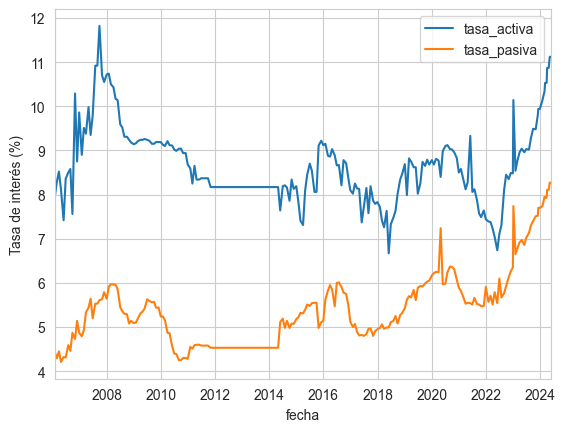

In [65]:
val_cols = ['tasa_pasiva','tasa_activa']
dft = df.pivot_table(index='fecha', values=val_cols, aggfunc='mean')
dft.replace(0, np.nan, inplace=True)
dft = dft.resample('W').mean().interpolate()
dft.iloc[:,0:5].plot(logy=False)
plt.ylabel('Tasa de interés (%)')
plt.show()


---

## Nivel 3: data no estructurada y que no usa HTML

En algunas ocasiones, la información que necesitamos se encuentra en una página web que está en HTML pero no es estática, es decir la página se va generando a medida que el usuario interactúa con ella. Este tipo de páginas web se conocen como páginas web dinámicas y es el caso más complicado para hacer web scraping porque requiere simular el comportamiento de un usuario.


Vamos a ver un ejemplo de una página web dinámica:

https://procesosjudiciales.funcionjudicial.gob.ec/


Ahora ustedes tienen que diseñar un algoritmo que haga lo siguiente:
- Ingresar a la página https://www.rottentomatoes.com/
- Buscar la película "Oppenheimer"
- Abrir las reseñas realizadas por críticos
- Ampliar el número de reseñas
- Extraer el nombre del crítico, la fecha de la reseña y el contenido de la reseña



In [67]:
import pandas as pd
import pickle
import argparse

import os
import sys
from tqdm import tqdm
from datetime import datetime
from joblib import Parallel, delayed

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains

In [132]:
url_opp = 'https://www.rottentomatoes.com/m/oppenheimer_2023/reviews'
service = Service(executable_path="./chromedriver-windows")
driver = webdriver.Chrome(service=service)
driver.set_page_load_timeout(10)

driver.get(url_opp)

In [136]:
find_load_more = (By.XPATH, '//rt-button[@data-qa="load-more-btn"]')
WebDriverWait(driver, 2).until(EC.element_to_be_clickable(find_load_more))
button = driver.find_element(*find_load_more)
button.click()

In [137]:
find_name = (By.CLASS_NAME, 'reviewer-name-and-publication')
names = driver.find_elements(*find_name)
names = [name.text.split('\n')[0] for name in names]

In [122]:
find_review = (By.CLASS_NAME, 'review-text')
reviews = driver.find_elements(*find_review)
reviews = [review.text for review in reviews]

In [123]:
# <span data-qa="review-date">May 21, 2024</span>
find_date = (By.XPATH, '//span[@data-qa="review-date"]')
dates = driver.find_elements(*find_date)
dates = [date.text for date in dates]

In [126]:
# unir todo en un DataFrame
df = pd.DataFrame({'name': names, 'review': reviews, 'date': dates})
df

,name,review,date
0,Chris McCoy,Oppenhiemer is a return to form for Nolan afte...,"May 21, 2024"
1,Shadan Larki,Oppenheimer is ultimately a cautionary tale ab...,"Apr 19, 2024"
2,Wesley Lovell,As increasing tensions with Russia rise once a...,"Apr 7, 2024"
3,Matt Neal,It's the bomb.,"Apr 1, 2024"
4,Cole Smithey,What promises to be Christopher Nolan's first ...,"Mar 24, 2024"
...,...,...,...
195,Ben Rolph,This could be Nolan’s finest masterpiece yet.,"Jul 24, 2023"
196,Louisa Moore,This historical biopic about the father of the...,"Jul 24, 2023"
197,Sebastian Zavala Kahn,A film that deals with the obsessions that hav...,"Jul 24, 2023"
198,Emma Badame,"Through powerful performances, filmmakers at t...","Jul 24, 2023"


In [ ]:
driver.quit()

Por último podemos hacer un poco de análisis cuantitativo sobre la data que hemos extraído.

In [127]:
from textblob import TextBlob

# Create a new column in the DataFrame for the sentiment score
df['sentiment'] = df['review'].apply(lambda review: TextBlob(review).sentiment.polarity)

<Axes: >

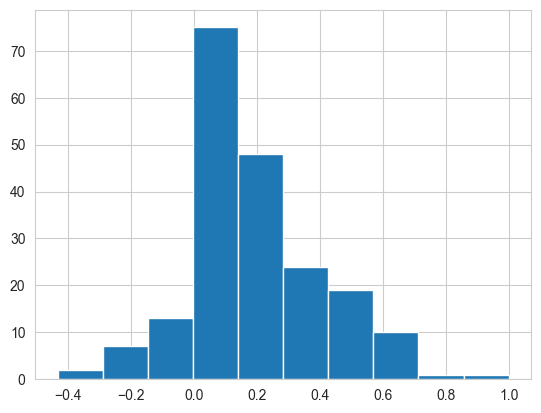

In [130]:
df.sentiment.hist()